In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(font="SimHei", font_scale=1.5)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

In [3]:
data = pd.read_excel(r'D:\生信\work.xlsx')
data.shape, (data.isnull().sum(axis=0) /
             data.shape[0]).sort_values(ascending=False).head(30), data.columns

((510, 186),
 Assay      0.0
 CD46       0.0
 ITGAM      0.0
 MBL2       0.0
 FCGR2A     0.0
 CDH1       0.0
 CCL5       0.0
 NCAM1      0.0
 CD59       0.0
 SELL       0.0
 NID1       0.0
 ST6GAL1    0.0
 CES1       0.0
 IL7R       0.0
 ENG        0.0
 IGFBP3     0.0
 PAM        0.0
 VCAM1      0.0
 CR2        0.0
 TCN2       0.0
 TNXB       0.0
 CA4        0.0
 KIT        0.0
 IGLC2      0.0
 F7         0.0
 MET        0.0
 FCGR3B     0.0
 LILRB5     0.0
 APOM       0.0
 SOD1       0.0
 dtype: float64,
 Index(['Assay', 'NT-proBNP', 'MEPE', 'TNFRSF14', 'LDL receptor', 'ITGB2',
        'IL-17RA', 'TNF-R2', 'MMP-9', 'EPHB4',
        ...
        'OSMR', 'C1QTNF1', 'CFHR5', 'MEGF9', 'CRTAC1', 'FETUB', 'ANGPTL3',
        'LYVE1', 'GP6', 'Condition'],
       dtype='object', length=186))

In [53]:
x=data.drop(["Condition","Assay"],axis=1)
y=data["Condition"]
SXtrain,SXtest, SYtrain, SYtest = train_test_split(x,
                                                y,
                                                test_size=0.2,
                                                random_state=0)

In [71]:
# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler



# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 定义XGBoost模型
model = XGBClassifier(booster='gbtree', objective='binary:logistic', reg_lambda=0.0000001,max_depth=25)

# 训练模型
model.fit(X_train, y_train)

# 计算训练集和测试集的AUC值
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("训练集AUC值:", train_auc)
print("测试集AUC值:", test_auc)

# 获取特征重要性得分
importance = model.feature_importances_

# 提取具有较高重要性得分的特征
threshold = np.mean(importance)
selected_features = np.where(importance > threshold)[0]
print("选取的特征:", selected_features)

训练集AUC值: 1.0
测试集AUC值: 0.568733153638814
选取的特征: [  2   5   7   8  10  14  16  17  19  22  24  25  28  30  31  33  34  35
  36  41  43  50  53  54  58  59  61  65  70  71  74  76  81  83  85  86
  88  90  98  99 100 103 109 112 115 119 125 129 130 131 134 138 139 145
 147 151 153 154 159 160 165 171 173 175]


In [56]:

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# 读取数据
data = pd.read_excel(r'D:\生信\work.xlsx')

# 分割数据集为训练集和测试集
train, test = train_test_split(data, test_size=0.2, random_state=42)

# 定义特征和目标变量
x=data.drop(["Condition","Assay"],axis=1)
y=data["Condition"]

# 定义XGBoost分类器和参数
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc")
params = {'max_depth': 3, 'eta': 0.1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'lambda': 1, 'alpha': 0}

# 使用L2正则化进行特征选择
l2_reg = np.logspace(-10, 1, 400)
best_auc = 0
best_reg = 0
for reg in l2_reg:
    xgb_classifier.set_params(reg_lambda=reg)
    xgb_classifier.fit(features, target)
    y_pred = xgb_classifier.predict_proba(test.drop(["target"], axis=1))[:, 1]
    auc = roc_auc_score(test["target"], y_pred)
    if auc > best_auc:
        best_auc = auc
        best_reg = reg

print("Best AUC:", best_auc)
print("Best regularization parameter:", best_reg)

# 输出特征重要性
xgb_classifier.set_params(reg_lambda=best_reg)
xgb_classifier.fit(features, target)
feature_importance = pd.Series(xgb_classifier.feature_importances_, index=features.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print("Feature importance:")
print(feature_importance)


NameError: name 'features' is not defined

In [54]:
# 岭回归
from sklearn.linear_model import Lasso

la = Lasso(alpha=0.001)
la.fit(SXtrain, SYtrain)
print("Training set score: {:.2f}".format(la.score(SXtrain, SYtrain)))
print("Test set score: {:.2f}".format(la.score(SXtest, SYtest)))
sorted([*zip(SXtrain.columns, la.coef_.ravel())],key=lambda s: abs(s[1]),reverse=True)

Training set score: 0.43
Test set score: -0.21


[('EFEMP1', -0.4840927130200448),
 ('EGFR', 0.33973092440209784),
 ('CNTN1', 0.27008803178741053),
 ('PAM', 0.267481305189078),
 ('F11', -0.2652164499728615),
 ('SHPS-1', -0.24016146365712743),
 ('UMOD', -0.23770587577548272),
 ('ST6GAL1', 0.22175322482037355),
 ('CD93', 0.2192804622444508),
 ('FAP', 0.20856683154304226),
 ('TGFBR3', 0.20652988933188932),
 ('SOD1', -0.18629190681860575),
 ('JAM-A', 0.17632388322609185),
 ('LTBR', -0.17410432353621053),
 ('OPG', -0.16498887377999175),
 ('KIT', -0.15939468662574627),
 ('TIMP4', 0.15610270791916572),
 ('TNFSF13B', -0.14904917388602484),
 ('IL-18BP', 0.14602643478908256),
 ('GP6', 0.14536687773486073),
 ('GP1BA', -0.14437522230830635),
 ('SPON1', 0.14382245234362082),
 ('AP-N', -0.14240353695770658),
 ('CST3', 0.14041936472711675),
 ('TNF-R1', -0.13953269578109115),
 ('TR', -0.13865198364167047),
 ('APOM', -0.13816924452126775),
 ('SELL', -0.1348152486562116),
 ('CD59', 0.13427555962808496),
 ('PROC', -0.13220126629717482),
 ('TNXB', 0.130

In [ ]:
# 进行特征筛选
selectX = data[['Bank id', 'a_Loans', 'a_Due_froms', 'a_Securities_others',
       'a_Securities_government', 'a_Cash', 'a_Other', 'Total Assets',
       'l_Capital', 'l_Surplus and Profits', 'l_Notes', 'l_Deposits',
       'l_Due_ to', 'l_Other', 'Total Liabilities', 'Group', 'In 1867 Sample'
]]
selectY = data["Type"]

#Xtrain, Xtest, Ytrain, Ytest = train_test_split(selectX,
#                                                selectY,
#                                                test_size=0.2,
#                                                random_state=42)

Xtrain=selectX
Ytrain=selectY
Xtest = dtest[['CASSPDRVGQETQYF_TRBV5-1_TRBJ2-5', 'CASSQTGGRNQPQHF_TRBV12_TRBJ1-5',
       'CASSRQGNYGYTF_TRBV12_TRBJ1-2', 'CASSERETQYF_TRBV2-1_TRBJ2-5',
       'CSARAGGNTGELFF_TRBV20_TRBJ2-2', 'CASSPRWQETQYF_TRBV27-1_TRBJ2-5',
       'CASSLLWDQPQHF_TRBV5-5_TRBJ1-5', 'CASSDRGNTGELFF_TRBV4-1_TRBJ2-2',
       'CASSPGDEQYF_TRBV25-1_TRBJ2-7', 'CASSGDRLYEQYF_TRBV2-1_TRBJ2-7',
       'CASSLIGVSSYNEQFF_TRBV7-9_TRBJ2-1', 'CATSDGDEQFF_TRBV24_TRBJ2-1',
       'CASSRGTGATDTQYF_TRBV19-1_TRBJ2-3', 'CASSLGDRAYNEQFF_TRBV5-6_TRBJ2-1',
       'CASSLDGTGELFF_TRBV5-1_TRBJ2-2', 'CAWRGTGNSPLHF_TRBV30-1_TRBJ1-6',
       'CASSLAPGATNEKLFF_TRBV7-6_TRBJ1-4', 'CASSLVIGGDTEAFF_TRBV5-1_TRBJ1-1',
       'CASSPYNEQFF_TRBV7-2_TRBJ2-1', 'CASSEARVGGYTF_TRBV6-1_TRBJ1-2',
       'CASSIGPLEHNEQFF_TRBV19-1_TRBJ2-1', 'CASSPPSGLTDTQYF_TRBV28-1_TRBJ2-3',
       'CASSYSRNTEAFF_TRBV6-6_TRBJ1-1', 'CATSRGTVSYEQYF_TRBV15-1_TRBJ2-7',
       'CATSRDTQGSYGYTF_TRBV15-1_TRBJ1-2', 'CASSRLAGGTDTQYF_TRBV7-3_TRBJ2-3',
       'CASSLVAGGRETQYF_TRBV5-6_TRBJ2-5', 'CASSQGLQETQYF_TRBV3_TRBJ2-5',
       'CASSQVETDTQYF_TRBV3_TRBJ2-3', 'CASSGQGAYEQYF_TRBV9-1_TRBJ2-7',
       'CASRTGYGYTF_TRBV6-5_TRBJ1-2', 'CASSPGHKETQYF_TRBV18-1_TRBJ2-5',
       'CASSSGLAGLETQYF_TRBV6-5_TRBJ2-5', 'CASSRGRQETQYF_TRBV7-6_TRBJ2-5',
       'CASSLEAEYEQYF_TRBV7-2_TRBJ2-7', 'CSVRDNFNQPQHF_TRBV29-1_TRBJ1-5',
       'CAWSASYEQYF_TRBV30-1_TRBJ2-7', 'CATSDGETQYF_TRBV24_TRBJ2-5',
       'CASSIEGNQPQHF_TRBV28-1_TRBJ1-5', 'CASSFPTSGQETQYF_TRBV7-9_TRBJ2-5',
       'CASSLGGAGDTQYF_TRBV12_TRBJ2-3', 'CASSLPSGLTDTQYF_TRBV28-1_TRBJ2-3',
       'CASSPGDEQFF_TRBV25-1_TRBJ2-1', 'CASSLDRDEQYF_TRBV5-4_TRBJ2-7',
       'CASSPGSSGNTIYF_TRBV18-1_TRBJ1-3', 'CASSLAPGNTEAFF_TRBV5-1_TRBJ1-1',
       'CASSEIPNTEAFF_TRBV6-4_TRBJ1-1', 'CASSQDLETQYF_TRBV4-1_TRBJ2-5',
       'CASSQNRGQETQYF_TRBV14-1_TRBJ2-5', 'CASSPQRNTEAFF_TRBV4-3_TRBJ1-1'
]]
Ytest = dtest["phenotype"]

In [12]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#import xgboost as xgb
from xgboost import XGBClassifier as XGBC
from sklearn.feature_selection import SelectFromModel

from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier()

XGB.fit(Xtrain,Ytrain) ##拟合模型

from sklearn.metrics import accuracy_score
train_score = accuracy_score(Ytrain,XGB.predict(Xtrain))
print('train_score',train_score)
test_score = accuracy_score(Ytest,XGB.predict(Xtest))
print('test_score',test_score)

test_predict4=XGB.predict(Xtest)

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score

conf = confusion_matrix(Ytest, test_predict4)
accuracy = (conf[0, 0] + conf[1, 1]) / (conf[0, 0] + conf[0, 1] + conf[1, 0] + conf[1, 1])
print('accuracy:',accuracy)
#accuracy.append(accuracy)
sensitivity = conf[1, 1] / (conf[1, 0] + conf[1, 1])
print('sensitivity:',sensitivity)
#特异度：
speciality = conf[0, 0] / (conf[0, 1] + conf[0, 0])
print('speciality:',speciality)
#F1分数：
F1_score = 2*conf[1, 1] / (2*conf[1, 1]+conf[1, 0] + conf[0, 1])
print('F1_score:',F1_score) 
#FDR：
FDR = conf[0, 1] / (conf[0, 1] + conf[1, 1])
print('FDR:',FDR)

score = XGB.predict_proba(Xtest)[:,1]
predict = XGB.predict(Xtest)
fpr,tpr,thres = roc_curve(Ytest,score)

print("AUC:",roc_auc_score(Ytest, score, average='macro', sample_weight=None))
print('Cross-entropy loss:',metrics.log_loss(Ytest, score))

#交叉验证
scores = cross_val_score(XGB,Xtrain,Ytrain,cv=10)
scores.mean()

train_score 1.0
test_score 0.5784313725490197
accuracy: 0.5784313725490197
sensitivity: 0.49056603773584906
speciality: 0.673469387755102
F1_score: 0.5473684210526316
FDR: 0.38095238095238093
AUC: 0.5837504813246053
Cross-entropy loss: 0.9567932601534196


0.5784146341463415

In [51]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 加载数据集
data = load_breast_cancer()
X = data.data
y = data.target

# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建XGBoost模型
model = xgb.XGBClassifier(objective='binary:logistic', reg_lambda=1, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 输出特征重要性排名
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
for i in sorted_idx:
    print(f"Feature {i+1}: {data.feature_names[i]} ({feature_importance[i]})")

# 选择特征重要性大于阈值的特征
threshold = 0.01
selected_features = [data.feature_names[i] for i in range(len(data.feature_names)) if feature_importance[i] > threshold]
print(f"Selected features: {selected_features}")

# 在测试集上进行预测
y_pred = model.predict_proba(X_test)[:, 1]

# 计算AUC值
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")


AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score


# 划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# 创建XGBoost分类器对象，并设置L2正则化参数
clf = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, alpha=1e-3)
clf.fit(Xtrain, Ytrain)

# 使用SelectFromModel进行特征选择
selector = SelectFromModel(clf)
X_train_selected = selector.fit_transform(Xtrain, Ytrain)
X_test_selected = selector.transform(Xtest)
Y_test=selector.transform(Ytest)

# 训练模型
clf.fit(X_train_selected, Ytrain)

# 预测测试集结果
y_pred = clf.predict(X_test_selected)
mse = mean_squared_error(Ytest, y_pred)
print("Mean squared error: ", mse)

score = XGB.predict_proba(X_test_selected)[:,1]

print("AUC:",roc_auc_score(Y_test,y_pred ))
print('Cross-entropy loss:',metrics.log_loss(Ytest, score))


C:\Users\C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [47]:
X_test_selected

array([[3.17366, 2.13523, 4.05082, ..., 0.35643, 3.97406, 3.10912],
       [3.9088 , 3.75455, 4.03439, ..., 0.59742, 3.78953, 3.81511],
       [3.25622, 4.59136, 4.94649, ..., 1.04384, 3.98486, 3.83284],
       ...,
       [3.26891, 3.5324 , 4.41586, ..., 0.63774, 2.98108, 2.89109],
       [3.4144 , 5.38044, 4.302  , ..., 0.83599, 3.7753 , 4.84331],
       [3.54632, 2.69562, 4.33042, ..., 0.60472, 3.54165, 4.6232 ]])

In [ ]:
# n_estimators的学习曲线

superpa=[]   # 建立的101次随机森林在不同的n_estimators的取值下的验证结果
for i in range(101):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,X,Y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))   # list.index(object)>>>返回对象obiect在列表list当中的索引
plt.figure(figsize=[20,5])
plt.plot(range(1,102),superpa)
plt.show()

[0]	validation_0-logloss:0.69306	validation_1-logloss:0.69314
[1]	validation_0-logloss:0.69297	validation_1-logloss:0.69313
[2]	validation_0-logloss:0.69287	validation_1-logloss:0.69312
[3]	validation_0-logloss:0.69278	validation_1-logloss:0.69311
[4]	validation_0-logloss:0.69269	validation_1-logloss:0.69310
[5]	validation_0-logloss:0.69260	validation_1-logloss:0.69310
[6]	validation_0-logloss:0.69251	validation_1-logloss:0.69308
[7]	validation_0-logloss:0.69242	validation_1-logloss:0.69308
[8]	validation_0-logloss:0.69233	validation_1-logloss:0.69307
[9]	validation_0-logloss:0.69224	validation_1-logloss:0.69306
[10]	validation_0-logloss:0.69215	validation_1-logloss:0.69305
[11]	validation_0-logloss:0.69206	validation_1-logloss:0.69304
[12]	validation_0-logloss:0.69197	validation_1-logloss:0.69303
[13]	validation_0-logloss:0.69188	validation_1-logloss:0.69302
[14]	validation_0-logloss:0.69178	validation_1-logloss:0.69301
[15]	validation_0-logloss:0.69169	validation_1-logloss:0.69300
[1

C:\Users\C\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.69024	validation_1-logloss:0.69286
[32]	validation_0-logloss:0.69015	validation_1-logloss:0.69286
[33]	validation_0-logloss:0.69006	validation_1-logloss:0.69285
[34]	validation_0-logloss:0.68997	validation_1-logloss:0.69284
[35]	validation_0-logloss:0.68988	validation_1-logloss:0.69283
[36]	validation_0-logloss:0.68979	validation_1-logloss:0.69282
[37]	validation_0-logloss:0.68970	validation_1-logloss:0.69281
[38]	validation_0-logloss:0.68961	validation_1-logloss:0.69280
[39]	validation_0-logloss:0.68952	validation_1-logloss:0.69279
[40]	validation_0-logloss:0.68943	validation_1-logloss:0.69279
[41]	validation_0-logloss:0.68934	validation_1-logloss:0.69278
[42]	validation_0-logloss:0.68925	validation_1-logloss:0.69277
[43]	validation_0-logloss:0.68916	validation_1-logloss:0.69276
[44]	validation_0-logloss:0.68907	validation_1-logloss:0.69275
[45]	validation_0-logloss:0.68898	validation_1-logloss:0.69274
[46]	validation_0-logloss:0.68889	validation_1-logloss:

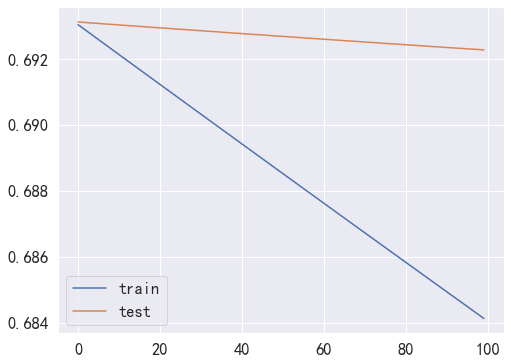

In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import pyplot

# 创建XGBoost分类器对象
evalset = [(Xtrain, Ytrain), (Xtest,Ytest)]
clf = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=100, learning_rate=0.0001, max_depth=25)

# 训练模型
clf.fit(Xtrain, Ytrain,eval_metric='logloss', eval_set=evalset)

# 预测测试集结果
y_pred = clf.predict(Xtest)
mse = mean_squared_error(Ytest, y_pred)
score = accuracy_score(Ytest, y_pred)
print("Mean squared error: ", mse)
#print("AUC:",roc_auc_score(Ytest, score, average='macro', sample_weight=None))


# 绘制学习曲线
plt.figure(figsize=(8,6))
#xgb.plot_learning_curve(clf, Xtrain, Ytrain)
#plt.title("Learning Curve")
#plt.show()
results = clf.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()